In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mrwellsdavid/unsw-nb15 --unzip

Dataset URL: https://www.kaggle.com/datasets/mrwellsdavid/unsw-nb15
License(s): unknown
 97% 144M/149M [00:02<00:00, 85.2MB/s]
100% 149M/149M [00:02<00:00, 71.7MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from IPython.core.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, LeakyReLU
from keras.models import Model
from keras.optimizers import Adam
from keras import regularizers
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("UNSW_NB15_training-set.csv")
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [ ]:
obj_df = df.select_dtypes(include=['object'])
obj_df.head()

,proto,service,state,attack_cat
0,udp,-,INT,Normal
1,udp,-,INT,Normal
2,udp,-,INT,Normal
3,udp,-,INT,Normal
4,udp,-,INT,Normal


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,82332.0,4.116650e+04,2.376735e+04,1.0,20583.750000,4.116650e+04,6.174925e+04,8.233200e+04
dur,82332.0,1.006756e+00,4.710444e+00,0.0,0.000008,1.413800e-02,7.193603e-01,5.999999e+01
spkts,82332.0,1.866647e+01,1.339164e+02,1.0,2.000000,6.000000e+00,1.200000e+01,1.064600e+04
dpkts,82332.0,1.754594e+01,1.155741e+02,0.0,0.000000,2.000000e+00,1.000000e+01,1.101800e+04
sbytes,82332.0,7.993908e+03,1.716423e+05,24.0,114.000000,5.340000e+02,1.280000e+03,1.435577e+07
dbytes,82332.0,1.323379e+04,1.514715e+05,0.0,0.000000,1.780000e+02,9.560000e+02,1.465753e+07
rate,82332.0,8.241089e+04,1.486204e+05,0.0,28.606114,2.650177e+03,1.111111e+05,1.000000e+06
sttl,82332.0,1.809677e+02,1.015134e+02,0.0,62.000000,2.540000e+02,2.540000e+02,2.550000e+02
dttl,82332.0,9.571300e+01,1.166677e+02,0.0,0.000000,2.900000e+01,2.520000e+02,2.530000e+02
sload,82332.0,6.454902e+07,1.798618e+08,0.0,11202.466797,5.770032e+05,6.514286e+07,5.268000e+09


In [ ]:
# Calculate value counts for the 'label' attribute
label_counts = df['label'].value_counts()

# Create a pie chart
fig = go.Figure(data=[go.Pie(labels=label_counts.index, values=label_counts.values)])

# Customize the layout
fig.update_layout(title='Distribution of Label Attribute',
                  font=dict(family='Arial', size=14),
                  legend=dict(x=1, y=0.5))

# Display the chart
fig.show()


In [ ]:
attack_cat_count = df['attack_cat'].value_counts()
labels = attack_cat_count.index
values = attack_cat_count.values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="Distribution of Attack Categories")
fig.show()


In [ ]:
# prompt: make the above pie plot with bold legends and closer to the pie plot

attack_cat_count = df['attack_cat'].value_counts()
labels = attack_cat_count.index
values = attack_cat_count.values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="Distribution of Attack Categories",
                  legend=dict(
                      x=0.1,  # Adjust x position to move legend closer
                      y=0.5,   # Adjust y position if needed
                      font=dict(
                          family="Arial",
                          size=20,
                          color="black",
                          #bold=True  # Make legend text bold
                      )
                  ))
fig.show()


In [ ]:
from ast import Continue
for column in df.select_dtypes(include=['object']).columns:
    if column in ['attack_cat', 'proto']:
        continue
    else:
        value_counts = df[column].value_counts()
        fig = go.Figure(data=[go.Pie(labels=value_counts.index, values=value_counts.values, hole=.3)])
        fig.update_layout(title_text=f"Distribution of {column}")
        fig.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])


In [ ]:
df = df.drop(['id'], axis=1)
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,117,0,4,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,6,0
1,0.000008,117,0,4,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,6,0
2,0.000005,117,0,4,2,0,1068,0,200000.0051,254,...,1,3,0,0,0,1,3,0,6,0
3,0.000006,117,0,4,2,0,900,0,166666.6608,254,...,1,3,0,0,0,2,3,0,6,0
4,0.000010,117,0,4,2,0,2126,0,100000.0025,254,...,1,3,0,0,0,2,3,0,6,0


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Assuming 'label' is the target variable
X = df.drop('label', axis=1)
y = df['label']

# Select top 10 features
selector = SelectKBest(chi2, k=4)
selector.fit(X, y)

# Get the indices of the selected features
top_features_indices = selector.get_support(indices=True)

# Get the names of the selected features
top_features_names = X.columns[top_features_indices]

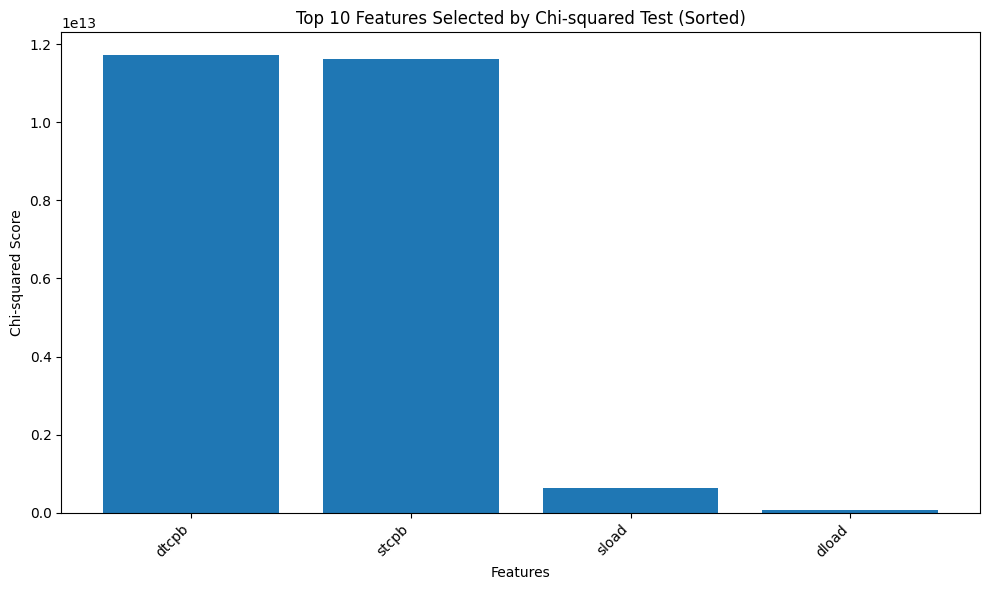

In [ ]:
sorted_indices = np.argsort(selector.scores_[top_features_indices])[::-1]
top_features_names_sorted = top_features_names[sorted_indices]
scores_sorted = selector.scores_[top_features_indices][sorted_indices]

# Create a bar chart with sorted features
plt.figure(figsize=(10, 6))
plt.bar(top_features_names_sorted, scores_sorted)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Chi-squared Score')
plt.title('Top 10 Features Selected by Chi-squared Test (Sorted)')
plt.tight_layout()
plt.show()


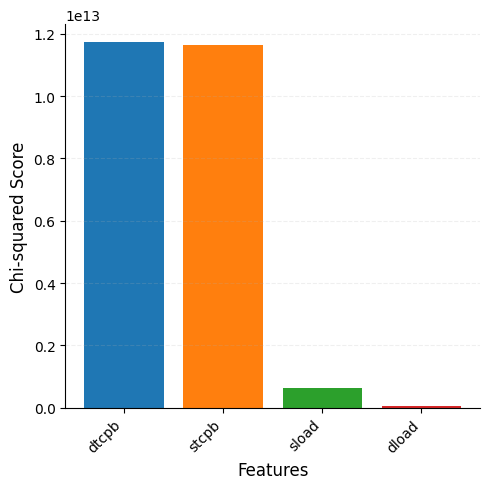

In [ ]:
# prompt: make above bar chat beautiful

# Assuming 'label' is the target variable
X = df.drop('label', axis=1)
y = df['label']

# Select top 10 features
selector = SelectKBest(chi2, k=4)
selector.fit(X, y)

# Get the indices of the selected features
top_features_indices = selector.get_support(indices=True)

# Get the names of the selected features
top_features_names = X.columns[top_features_indices]
sorted_indices = np.argsort(selector.scores_[top_features_indices])[::-1]
top_features_names_sorted = top_features_names[sorted_indices]
scores_sorted = selector.scores_[top_features_indices][sorted_indices]

# Create a bar chart with sorted features
plt.figure(figsize=(5, 5))
bars = plt.bar(top_features_names_sorted, scores_sorted, color=sns.color_palette("tab10", len(top_features_names_sorted)))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Chi-squared Score', fontsize=12)
#plt.title('Top 10 Features Selected by Chi-squared Test (Sorted)', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.2)
sns.despine()  # Remove top and right spines
plt.tight_layout()
plt.show()



In [ ]:
df1 = df[top_features_names_sorted.tolist() + ['attack_cat','label']]

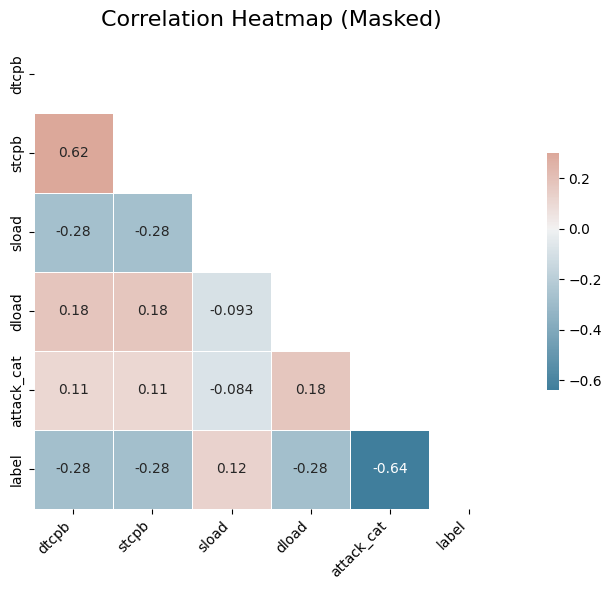

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Heatmap (Masked)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
threshold = 0.5

# Get pairs of highly correlated features
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            highly_correlated_pairs.append(pair)

# Print the highly correlated pairs
print("Highly Correlated Attribute Pairs (Correlation > 0.5):")
for pair in highly_correlated_pairs:
    print(pair)


Highly Correlated Attribute Pairs (Correlation > 0.5):
('dtcpb', 'stcpb')
('attack_cat', 'label')


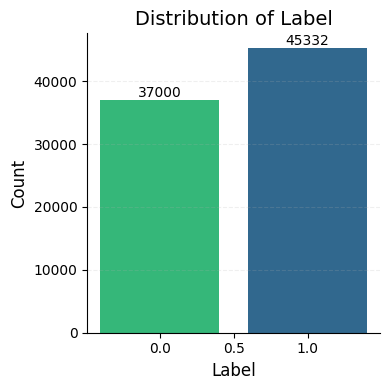

In [ ]:
# prompt: make the beautiful bar chat of label column

# Calculate value counts for the 'label' column
label_counts = df['label'].value_counts()

# Create a bar chart
plt.figure(figsize=(4, 4))
bars = plt.bar(label_counts.index, label_counts.values, color=sns.color_palette("viridis", len(label_counts)))
plt.xlabel('Label', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Label', fontsize=14)

# Add value labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')

# Add grid and adjust layout
plt.grid(axis='y', linestyle='--', alpha=0.2)
sns.despine()  # Remove top and right spines
plt.tight_layout()
plt.show()


In [ ]:
label_counts = df1['label'].value_counts()
print(label_counts)

label
1    45332
0    37000
Name: count, dtype: int64


In [ ]:
from sklearn.utils import resample
majority_class = df1['label'].value_counts().idxmax()
minority_class = df1['label'].value_counts().idxmin()
df_majority = df1[df1['label'] == majority_class]
df_minority = df1[df1['label'] == minority_class]
df_majority_downsampled = resample(df_majority,
                                 replace=False,n_samples=20000,random_state=42)
df_minority = resample(df_minority,
                                 replace=True,n_samples=20000,random_state=42)
df_balanced = pd.concat([df_majority_downsampled, df_minority])
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)
print(df_balanced['label'].value_counts())


label
0    20000
1    20000
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
y = df_balanced['label']
x = df_balanced.drop('label', axis=1)

In [ ]:
x.shape

(40000, 5)

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# **GAN**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, LeakyReLU
from keras.models import Model
from keras.optimizers import Adam
from keras import regularizers
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
d_losses = []  # Discriminator losses
d_accuracies = []  # Discriminator accuracies
g_losses = []  # Generator losses

# Standardize the features
scaler = StandardScaler()
x = scaler.fit_transform(x)


input_dim = x_train.shape[1]
latent_dim = 150
epochs = 16
batch_size = 128
learning_rate = 0.0002  # Reduced learning rate
beta_1 = 0.5  # Beta_1 for Adam optimizer

# Build the generator with regularization
def build_generator(latent_dim, output_dim):
    input = Input(shape=(latent_dim,))
    x = Dense(128, kernel_regularizer=regularizers.l2(0.002))(input)  # L2 regularization
    x = LeakyReLU(alpha=0.2)(x)
    x = Dense(output_dim, activation='sigmoid')(x)
    model = Model(input, x)
    return model

# Build the discriminator with regularization
def build_discriminator(input_dim):
    input = Input(shape=(input_dim,))
    x = Dense(128, kernel_regularizer=regularizers.l2(0.002))(input)  # L2 regularization
    x = LeakyReLU(alpha=0.2)(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(input, x)
    return model

# Compile the discriminator with a lower learning rate
discriminator = build_discriminator(input_dim)
optimizer = Adam(learning_rate=learning_rate, beta_1=beta_1)  # Using Adam with adjusted parameters
discriminator.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
# Compile the discriminator
discriminator = build_discriminator(input_dim)
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Build and compile the GAN
generator = build_generator(latent_dim, input_dim)
z = Input(shape=(latent_dim,))
generated_data = generator(z)
discriminator.trainable = False
validity = discriminator(generated_data)

combined = Model(z, validity)
combined.compile(optimizer='adam', loss='binary_crossentropy')

# Training the GAN
def train_gan(generator, discriminator, combined, X_train, epochs, batch_size, latent_dim):
    for epoch in range(epochs):
        # Train the discriminator
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        real_data = X_train[idx]
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        fake_data = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(real_data, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_data, np.zeros((batch_size, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        valid_y = np.ones((batch_size, 1))
        g_loss = combined.train_on_batch(noise, valid_y)
        print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100 * d_loss[1]:.2f}%] [G loss: {g_loss}]")
        d_losses.append(d_loss[0])
        d_accuracies.append(100 * d_loss[1])
        g_losses.append(g_loss)

x_train_array = x_train  # Extract NumPy array from DataFrame

# Train the GAN using the NumPy array
train_gan(generator, discriminator, combined, x_train_array, epochs, batch_size, latent_dim)


KeyError: "None of [Index([25648, 14728, 12039,  4074, 30572, 25676, 11927,  3803, 31909, 12592,\n       ...\n        5807, 13240,  1368,  2619, 26590, 10840, 22389, 29048,  3819,  3692],\n      dtype='int64', length=128)] are in the [columns]"

In [ ]:
# After training, create the plot
epochs_range = list(range(1, 21)) # Convert range to a list

fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=epochs_range, y=d_losses, name="Discriminator Loss"),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter(x=epochs_range, y=d_accuracies, name="Discriminator Accuracy"),
    secondary_y=True,
)
fig.add_trace(
    go.Scatter(x=epochs_range, y=g_losses, name="Generator Loss"),
    secondary_y=False,
)

# Add figure title
fig.update_layout(
    title_text="GAN Training Performance",
    xaxis_title="Epoch",
)

# Set y-axes titles
fig.update_yaxes(title_text="Loss", secondary_y=False)
fig.update_yaxes(title_text="Accuracy", secondary_y=True, range=[0, 100])

# Customize appearance for sharp labels
fig.update_layout(
    font=dict(family="Arial", size=14, color="black"),
    plot_bgcolor="white",
    paper_bgcolor="white",
    xaxis=dict(showgrid=True, gridwidth=1, gridcolor="lightgrey"),
    yaxis=dict(gridwidth=1, gridcolor="lightgrey"),
)

fig.show()

In [ ]:
# Evaluate the discriminator on the test set
from sklearn.metrics import accuracy_score
predictions = discriminator.predict(x_test)
predictions = (predictions > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

250/250 [==============================] - 0s 1ms/step
Test Accuracy: 75.78%


In [ ]:
#combined.save('combined_gan_model.h5')

Precision: 0.68
Recall: 0.96
F1-score: 0.80
Confusion Matrix:
[[2289 1777]
 [ 161 3773]]


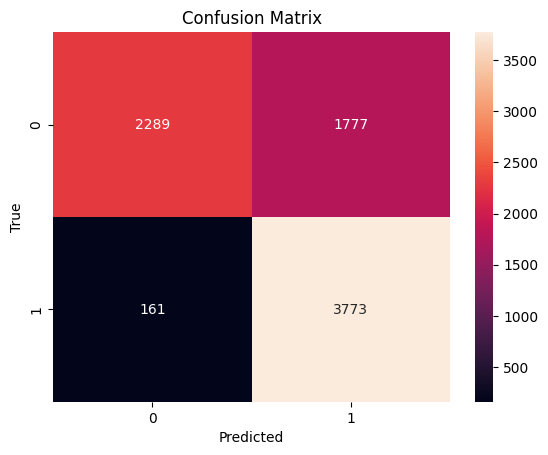

In [ ]:
# Precision, Recall, and F1-score
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(cm)

# You can visualize the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.6 MB/s eta 0:00:00


# **GCN**

# **GAT**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.data import Data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
x_train_tensor = torch.tensor(x_train.values, dtype=torch.float)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)  # Assuming y_train is a Pandas Series
x_test_tensor = torch.tensor(x_test.values, dtype=torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Create PyTorch Datasets
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

class GAT(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, heads):
        super(GAT, self).__init__()
        self.conv1 = GATConv(input_dim, hidden_dim, heads=heads)
        self.conv2 = GATConv(hidden_dim * heads, output_dim, heads=1)
        # Replace None with your actual edge index tensor
        self.edge_index = torch.tensor([[], []], dtype=torch.long) # YOUR EDGE INDEX HERE

    def forward(self, x):
        # Pass edge_index to the GATConv layers
        x = F.relu(self.conv1(x, edge_index=self.edge_index))
        x = self.conv2(x, edge_index=self.edge_index)
        return F.log_softmax(x, dim=1)

# Instantiate the model, loss function, and optimizer
input_dim = x_train.shape[1]
hidden_dim = 128
output_dim = 2  # Binary classification
heads = 8
model = GAT(input_dim, hidden_dim, output_dim, heads)
criterion = torch.nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        # Pass batch_x to the model
        output = model(batch_x)
        loss = criterion(output, batch_y)
        loss.backward()
        optimizer.step()

    # Evaluation on test set
    model.eval()
    with torch.no_grad():
        y_pred = []
        for batch_x, _ in test_loader:
            output = model(batch_x)
            pred = output.argmax(dim=1)
            y_pred.extend(pred.tolist())

    accuracy = accuracy_score(y_test_tensor.tolist(), y_pred)
    print(f"Epoch {epoch+1}/{num_epochs}, Test Accuracy: {accuracy:.4f}")

Epoch 1/10, Test Accuracy: 0.6870
Epoch 2/10, Test Accuracy: 0.7364
Epoch 3/10, Test Accuracy: 0.4318
Epoch 4/10, Test Accuracy: 0.7369
Epoch 5/10, Test Accuracy: 0.5019
Epoch 6/10, Test Accuracy: 0.7596
Epoch 7/10, Test Accuracy: 0.7502
Epoch 8/10, Test Accuracy: 0.7461
Epoch 9/10, Test Accuracy: 0.7504
Epoch 10/10, Test Accuracy: 0.4655


In [ ]:
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Assuming 'model', 'test_loader', and 'y_test_tensor' are already defined from the previous code

model.eval()
y_pred = []
y_true = []  # To store true labels

with torch.no_grad():
    for batch_x, batch_y in test_loader:
        output = model(batch_x)  # Pass batch_x to the model
        pred = output.argmax(dim=1)
        y_pred.extend(pred.tolist())
        y_true.extend(batch_y.tolist())  # Collect true labels

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)


Test Accuracy: 0.7119
Precision: 0.6500
Recall: 0.8973
F1-score: 0.7539
Confusion Matrix:
[[2165 1901]
 [ 404 3530]]


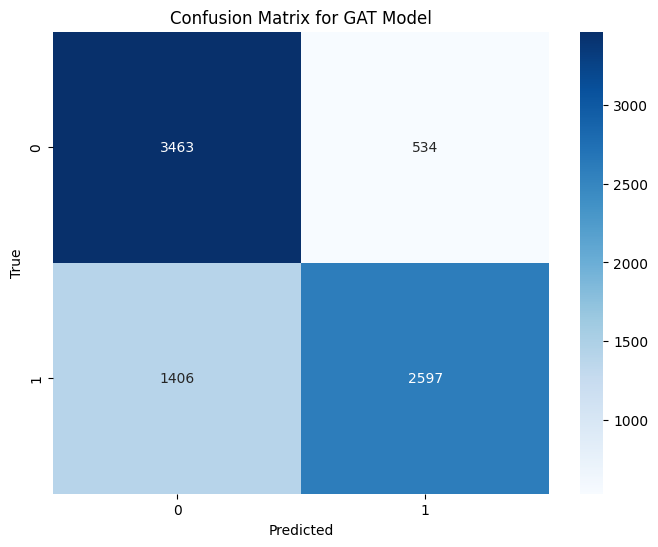

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for GAT Model')
plt.show()


# **Hybrid**

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 61ms/step
Epoch 7/10, Test Accuracy: 0.4961
1/1 [==============================] - 0s 45ms/step
Epoch 8/10, Test Accuracy: 0.4991
1/1 [==============================] - 0s 53ms/step
Epoch 9/10, Test Accuracy: 0.5035
1/1 [==============================] - 0s 49ms/step
Epoch 10/10, Test Accuracy: 0.4955


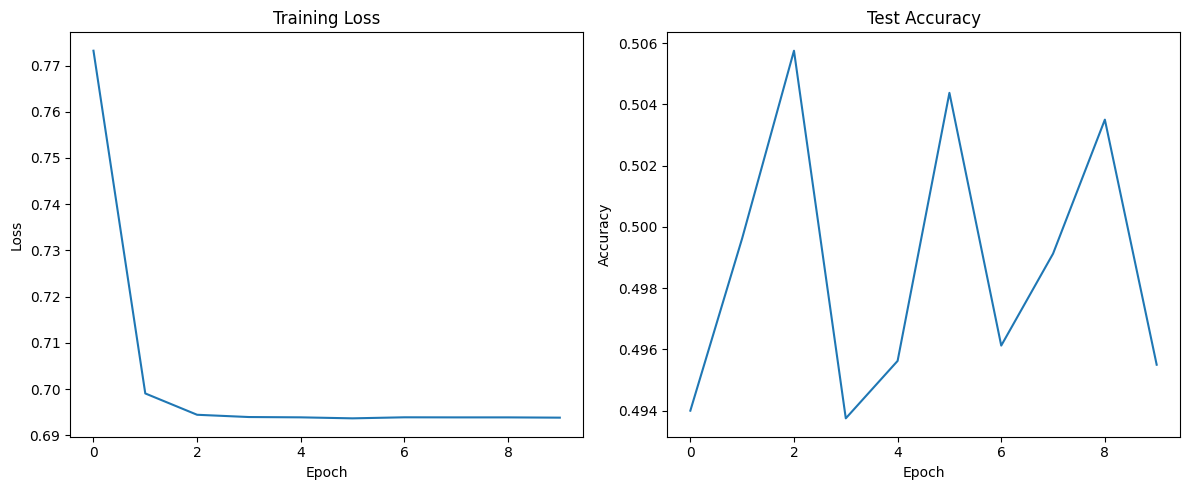

In [ ]:
class HybridModel(nn.Module):
    def __init__(self, gan_generator, gat, latent_dim):
        super(HybridModel, self).__init__()
        self.gan_generator = gan_generator
        self.gat = gat
        self.latent_dim = latent_dim

    def forward(self, noise):
        noise_np = noise.detach().numpy()
        generated_data = self.gan_generator.predict(noise_np)
        generated_data = generated_data.reshape(generated_data.shape[0], -1)
        generated_data_tensor = torch.tensor(generated_data, dtype=torch.float)
        output = self.gat(generated_data_tensor)
        return output
latent_dim = 150  # Same as in your GAN
hybrid_model = HybridModel(generator, model, latent_dim)  # Use the trained generator and GAT
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(hybrid_model.parameters(), lr=0.0001)

# Training loop for the hybrid model
num_epochs = 10
train_losses = []
test_accuracies = []
for epoch in range(num_epochs):
    hybrid_model.train()
    epoch_loss = 0.0
    for _ in range(len(train_loader)):
        noise = torch.randn(batch_size, latent_dim)
        optimizer.zero_grad()
        output = hybrid_model(noise)
        loss = criterion(output, torch.randint(0, 2, (batch_size,)))  # Random labels for now
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    train_losses.append(epoch_loss / len(train_loader))

    # Evaluation on test set
    hybrid_model.eval()
    with torch.no_grad():
        y_pred = []
        for batch_x, _ in test_loader:
            noise = torch.randn(batch_x.shape[0], latent_dim)
            output = hybrid_model(noise)
            pred = output.argmax(dim=1)
            y_pred.extend(pred.tolist())

    accuracy = accuracy_score(y_test_tensor.tolist(), y_pred)
    test_accuracies.append(accuracy)
    print(f"Epoch {epoch+1}/{num_epochs}, Test Accuracy: {accuracy:.4f}")

# Plotting the training loss and test accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(test_accuracies)
plt.title("Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()


32/32 [==============================] - 0s 4ms/step
Hybrid Model Evaluation:
Test Accuracy: 0.5105
Precision: 0.8333
Recall: 0.0151
F1-score: 0.0297
Confusion Matrix:
[[4024   12]
 [3904   60]]


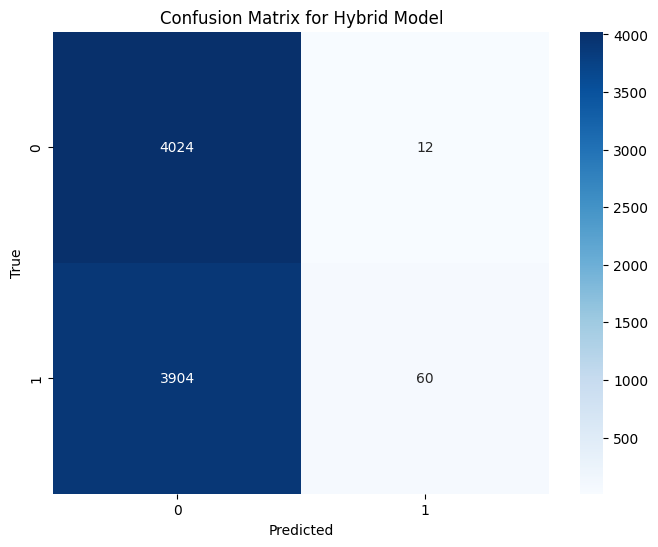

In [ ]:
num_synthetic_samples = 1000  # Adjust as needed
noise = np.random.normal(0, 1, (num_synthetic_samples, latent_dim))
synthetic_data = generator.predict(noise)

# 2. Combine synthetic data with original training data for GRU
x_train_combined = np.concatenate((x_train, synthetic_data), axis=0)
y_train_combined = np.concatenate((y_train, np.zeros(num_synthetic_samples)))  # Label synthetic data as 0 (or adjust as needed)

# 3. Convert combined data to PyTorch tensors and create DataLoader
x_train_combined_tensor = torch.tensor(x_train_combined, dtype=torch.float)
y_train_combined_tensor = torch.tensor(y_train_combined, dtype=torch.long)
train_dataset_combined = TensorDataset(x_train_combined_tensor, y_train_combined_tensor)
train_loader_combined = DataLoader(train_dataset_combined, batch_size=batch_size, shuffle=True)

# 4. Retrain the GRU model with combined data
model_hybrid = GAT(input_dim, hidden_dim, output_dim, heads)  # Re-initialize the model
criterion = torch.nn.NLLLoss()
optimizer = torch.optim.Adam(model_hybrid.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    model_hybrid.train()
    for batch_x, batch_y in train_loader_combined:
        optimizer.zero_grad()
        output = model_hybrid(batch_x)
        loss = criterion(output, batch_y)
        loss.backward()
        optimizer.step()

# 5. Evaluate the hybrid model
model_hybrid.eval()
y_pred_hybrid = []
y_true = []

with torch.no_grad():
    for batch_x, batch_y in test_loader:
        output = model_hybrid(batch_x)
        pred = output.argmax(dim=1)
        y_pred_hybrid.extend(pred.tolist())
        y_true.extend(batch_y.tolist())

# Calculate evaluation metrics for the hybrid model
accuracy_hybrid = accuracy_score(y_true, y_pred_hybrid)
precision_hybrid = precision_score(y_true, y_pred_hybrid)
recall_hybrid = recall_score(y_true, y_pred_hybrid)
f1_hybrid = f1_score(y_true, y_pred_hybrid)
cm_hybrid = confusion_matrix(y_true, y_pred_hybrid)

print("Hybrid Model Evaluation:")
print(f"Test Accuracy: {accuracy_hybrid:.4f}")
print(f"Precision: {precision_hybrid:.4f}")
print(f"Recall: {recall_hybrid:.4f}")
print(f"F1-score: {f1_hybrid:.4f}")
print("Confusion Matrix:")
print(cm_hybrid)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_hybrid, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Hybrid Model')
plt.show()


Epoch 1/10, Loss: 22.9623, Accuracy: 68.95%
Epoch 2/10, Loss: 14.0782, Accuracy: 68.96%
Epoch 3/10, Loss: 352.0574, Accuracy: 68.66%
Epoch 4/10, Loss: 82.4821, Accuracy: 68.30%
Epoch 5/10, Loss: 1155.9423, Accuracy: 68.34%
Epoch 6/10, Loss: 4.2545, Accuracy: 68.32%
Epoch 7/10, Loss: 12.4893, Accuracy: 68.37%
Epoch 8/10, Loss: 23.4522, Accuracy: 68.32%
Epoch 9/10, Loss: 28.2532, Accuracy: 68.30%
Epoch 10/10, Loss: 22.9265, Accuracy: 68.33%


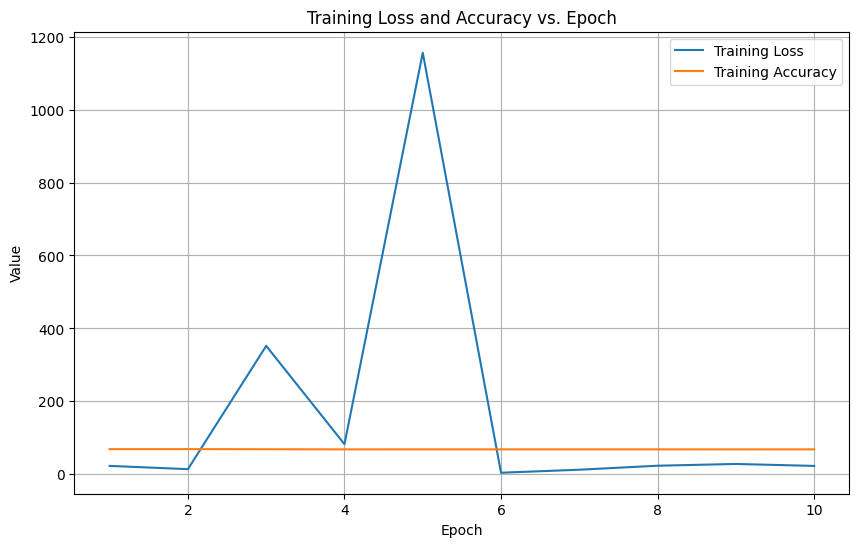

In [ ]:
# prompt: make the one line plot having both accuracy and loss with respect to epoch of above hybrid model

# Initialize lists to store metrics
train_losses = []
train_accuracies = []

# Training loop (modified to store metrics)
num_epochs = 10
for epoch in range(num_epochs):
    model_hybrid.train()
    epoch_loss = 0
    correct_predictions = 0
    total_samples = 0

    for batch_x, batch_y in train_loader_combined:
        optimizer.zero_grad()
        output = model_hybrid(batch_x)
        loss = criterion(output, batch_y)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * batch_x.size(0)
        _, predicted = torch.max(output.data, 1)
        total_samples += batch_y.size(0)
        correct_predictions += (predicted == batch_y).sum().item()

    # Calculate average loss and accuracy for the epoch
    avg_loss = epoch_loss / len(train_loader_combined.dataset)
    accuracy = 100 * correct_predictions / total_samples
    train_losses.append(avg_loss)
    train_accuracies.append(accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training Loss and Accuracy vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/10, Loss: 11552.7303, Accuracy: 75.53%
Epoch 2/10, Loss: 2833.1310, Accuracy: 78.99%
Epoch 3/10, Loss: 116.6450, Accuracy: 76.19%
Epoch 4/10, Loss: 15.0405, Accuracy: 72.53%
Epoch 5/10, Loss: 13.0571, Accuracy: 70.78%
Epoch 6/10, Loss: 26.8126, Accuracy: 69.79%
Epoch 7/10, Loss: 24.2406, Accuracy: 69.53%
Epoch 8/10, Loss: 51.9050, Accuracy: 69.39%
Epoch 9/10, Loss: 192.6419, Accuracy: 69.34%
Epoch 10/10, Loss: 13.3446, Accuracy: 69.04%


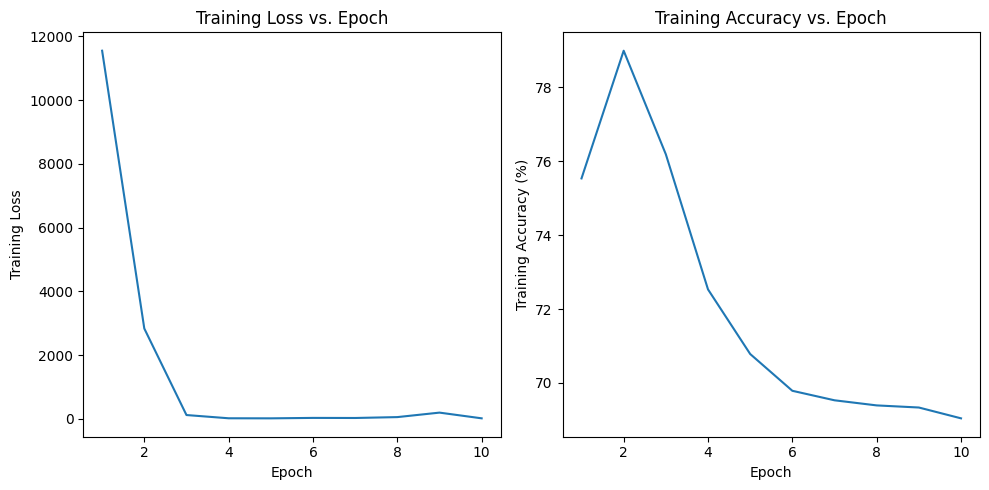

In [ ]:
# prompt: make the line plot of accuracy and loss with respect to epoch of above hybrid model

train_losses = []
train_accuracies = []

num_epochs = 10
for epoch in range(num_epochs):
    model_hybrid.train()
    epoch_loss = 0
    correct_predictions = 0
    total_samples = 0
    for batch_x, batch_y in train_loader_combined:
        optimizer.zero_grad()
        output = model_hybrid(batch_x)
        loss = criterion(output, batch_y)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * batch_x.size(0)
        _, predicted = torch.max(output.data, 1)
        total_samples += batch_y.size(0)
        correct_predictions += (predicted == batch_y).sum().item()

    # Calculate average loss and accuracy for the epoch
    epoch_loss /= len(train_loader_combined.dataset)
    epoch_accuracy = 100 * correct_predictions / total_samples

    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

# Plotting the training loss and accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. Epoch')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracies)
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy (%)')
plt.title('Training Accuracy vs. Epoch')

plt.tight_layout()
plt.show()


In [ ]:
acc=[75, 71,71,77]
pre=[68,64,65,83]
rec=[96,99,89,65]
fs=[80,78,75,73]
algos = ['GAN','GCN' 'GAT', 'G-GAN']

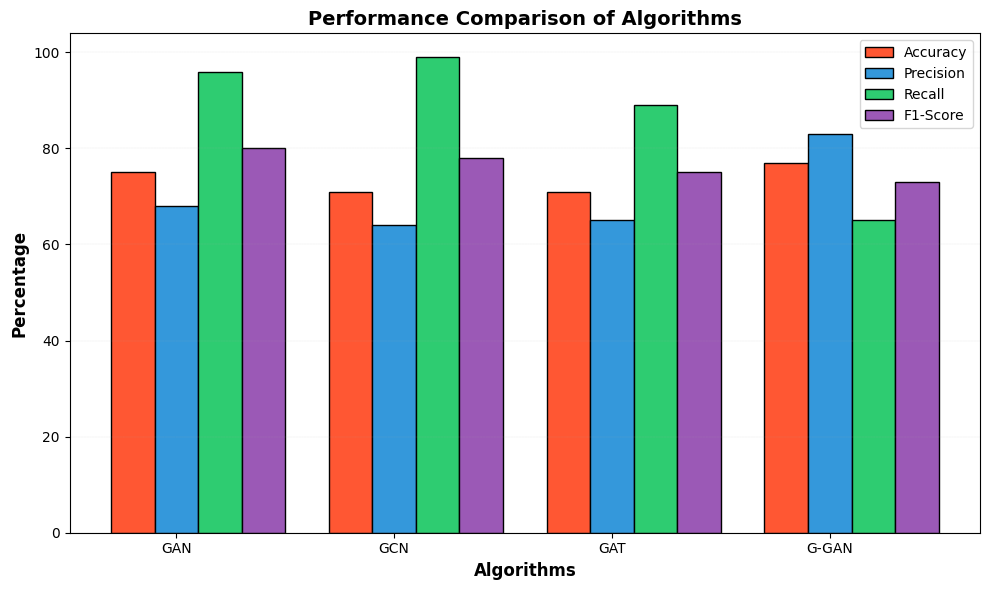

In [ ]:
# prompt: make the beautiful plot  with bold colors and sharp labels to compare the results of algorithms using above four lists

import matplotlib.pyplot as plt

# Data
acc = [75, 71, 71, 77]
pre = [68, 64, 65, 83]
rec = [96, 99, 89, 65]
fs = [80, 78, 75, 73]
algos = ['GAN', 'GCN', 'GAT', 'G-GAN']

# Bold and bright colors
colors = ['#FF5733', '#3498DB', '#2ECC71', '#9B59B6']

# Bar width
bar_width = 0.2

# Set position of bar on X axis
r1 = range(len(acc))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Make the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

plt.bar(r1, acc, color=colors[0], width=bar_width, edgecolor='black', label='Accuracy')
plt.bar(r2, pre, color=colors[1], width=bar_width, edgecolor='black', label='Precision')
plt.bar(r3, rec, color=colors[2], width=bar_width, edgecolor='black', label='Recall')
plt.bar(r4, fs, color=colors[3], width=bar_width, edgecolor='black', label='F1-Score')

# Add labels, title, and legend
plt.xlabel('Algorithms', fontweight='bold', fontsize=12)
plt.ylabel('Percentage', fontweight='bold', fontsize=12)
plt.title('Performance Comparison of Algorithms', fontweight='bold', fontsize=14)
plt.xticks([r + bar_width for r in range(len(acc))], algos)  # Center the x-axis labels
plt.legend()

# Customize the grid
plt.grid(True, axis='y', linestyle='--', linewidth=0.1)

# Show the plot
plt.tight_layout()
plt.show()
